In [47]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel('50startups.xlsx')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
dummies = pd.get_dummies(data.State)

In [9]:
data = pd.concat([data, dummies], axis=1, sort=False)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [10]:
#now we don't need "State" anymore
del data['State']

#also to avoid "dummy variable trap", we remove one of the categories from dummies created
#we'll remove one with least no. of ones

In [11]:
states = ['California', 'Florida', 'New York']
for state in states:
    print (state + ":\n" + str(data[state].value_counts()))

California:
0    33
1    17
Name: California, dtype: int64
Florida:
0    34
1    16
Name: Florida, dtype: int64
New York:
0    33
1    17
Name: New York, dtype: int64


In [12]:
#since they are all same we can delete anyone
del data['California']

In [13]:
target = data['Profit']

In [14]:
del data['Profit']
data.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [15]:
#normalize columns with high values
for col in ['R&D Spend', 'Administration', 'Marketing Spend']:
    data[col] = ((data[col] - data[col].min()) / (data[col].max() - data[col].min()))

In [16]:
data.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,1.000000,0.651744,1.000000,0,1
1,0.983359,0.761972,0.940893,0,0
2,0.927985,0.379579,0.864664,1,0
3,0.873136,0.512998,0.812235,0,1
4,0.859438,0.305328,0.776136,1,0


In [17]:
target = (target - target.min()) / (target.max() - target.min())
target

0     1.000000
1     0.997355
2     0.993178
3     0.947292
4     0.853171
5     0.801382
6     0.796490
7     0.794407
8     0.774468
9     0.760661
10    0.740175
11    0.729686
12    0.714629
13    0.673644
14    0.664044
15    0.648921
16    0.632454
17    0.623317
18    0.617103
19    0.608713
20    0.584482
21    0.544157
22    0.538747
23    0.529634
24    0.528609
25    0.522146
26    0.512737
27    0.508654
28    0.498934
29    0.486108
30    0.480099
31    0.466280
32    0.465966
33    0.462312
34    0.461939
35    0.460626
36    0.428126
37    0.423852
38    0.374747
39    0.373489
40    0.357914
41    0.355430
42    0.319951
43    0.310156
44    0.284485
45    0.282940
46    0.196020
47    0.156990
48    0.118211
49    0.000000
Name: Profit, dtype: float64

In [43]:
def predict(features, theta):
    predictions = np.dot(features, theta)
    return predictions

In [71]:
def result(y, predictions):
    sum_error = 0
    for i in range(y.shape[0]):
        error = (y[i] - predictions[i]) ** 2
        sum_error += error
    print(math.sqrt(sum_error))
    return math.sqrt(sum_error)

In [39]:
def linear_regressor(x, y, alpha, iters):
    x=np.matrix(x)
    y=np.matrix(y).transpose()
    m, n = np.shape(x)
    beta = np.matrix(np.ones(n)).transpose()
    XT = x.transpose()
    for i in range(0, iters):
        y_hat = np.dot(x, beta)
        error = y_hat - y
        MSE = (error.transpose()*error)/len(x)
        gradient = np.dot(XT, error) / m
        beta = beta - alpha * gradient
    return beta

In [34]:
def ridge_regressor(x, y, alpha, L, iters):
    x=np.matrix(x)
    y=np.matrix(y).transpose()
    m, n = np.shape(x)
    beta = np.matrix(np.ones(n)).transpose()
    XT = x.transpose()
    for i in range(0, iters):
        y_hat = np.dot(x, beta)
        error = y_hat - y
        MSE = (error.transpose()*error)/len(x)
        gradient = np.dot(XT, error) / m
        beta = beta - alpha * (gradient + (L/m)*beta)
    return beta

In [77]:
def lasso_regressor(x, y, alpha, L, iters):
    x=np.matrix(x)
    y=np.matrix(y).transpose()
    m, n = np.shape(x)
    beta = np.matrix(np.ones(n)).transpose()
    XT = x.transpose()
    for i in range(0, iters):
        y_hat = np.dot(x, beta)
        residuals = y_hat - y
        MSE = (residuals.transpose()*residuals)/len(x)
        gradient = np.dot(XT, residuals) / m
        beta = beta - alpha * (gradient + (L/m))
    return beta

In [85]:
def main():
    features = np.array(data)
    Y = np.array(target)
    ones = np.ones_like(features[:,0])
    ones = np.expand_dims(ones, axis=1)
    features = np.concatenate((ones, features), axis=1) #append ones
    n_epochs = [int(i) for i in range(20, 800, 50)]
    print("-----------Linear Regression--------------")
    print("RMSEs:")
    rmse_lin = []
    for n in n_epochs:
        theta1 = linear_regressor(features, Y, 0.005, n)
        predictions1 = predict(features, theta1)
        print(n, end=": ")
        rmse_lin.append(result(target, predictions1))
    print("Theta: ", end=' ')
    print(theta1)
    
    print("------------------Ridge Regression---------------------")
    print("RMSEs:")
    rmse_ridge = []
    for n in n_epochs:
        theta2 = ridge_regressor(features, Y, 0.005, 0.05, n)
        predictions2 = predict(features, theta2)
        print(n, end=": ")
        rmse_ridge.append(result(target, predictions2))
    print("Theta: ", end=' ')
    print(theta2)
    
    print("------------------Lasso Regression---------------------")
    print("RMSEs:")
    rmse_lasso = []
    for n in n_epochs:
        theta3 = lasso_regressor(features, Y, 0.005, 0.05, n)
        predictions3 = predict(features, theta3)
        print(n, end=": ")
        rmse_lasso.append(result(target, predictions3))
    print("Theta: ", end=' ')
    print(theta3)
    plt.plot(n_epochs, rmse_lin, 'g^')
    #plt.plot(n_epochs, rmse_ridge, 'bo')
    plt.plot(n_epochs, rmse_lasso, 'b--')

-----------Linear Regression--------------
RMSEs:
20: 15.244686363694044
70: 9.432908131820689
120: 5.938889569956883
170: 3.8869095099474484
220: 2.7372750893611495
270: 2.138255679454729
320: 1.846721942751021
370: 1.705711057314375
420: 1.6305404623082518
470: 1.5825040152004348
520: 1.5455788304177607
570: 1.513431936321061
620: 1.4836029722317914
670: 1.4551367002753424
720: 1.4276564463532948
770: 1.4010070899936802
Theta:  [[-0.22010891]
 [ 0.40359869]
 [ 0.29462899]
 [ 0.3742034 ]
 [ 0.37070731]
 [ 0.37163788]]
------------------Ridge Regression---------------------
RMSEs:
20: 15.24278737479938
70: 9.428599580224118
120: 5.934013168724168
170: 3.88225488779796
220: 2.733130076939476
270: 2.1346480540444976
320: 1.8435173108768659
370: 1.7027175772250043
420: 1.6275986376536626
470: 1.5795111004113254
520: 1.5424770292852856
570: 1.510191948326265
620: 1.4802122042342993
670: 1.4515921071966655
720: 1.4239603891836443
770: 1.3971649558203039
Theta:  [[-0.21839591]
 [ 0.40272787]

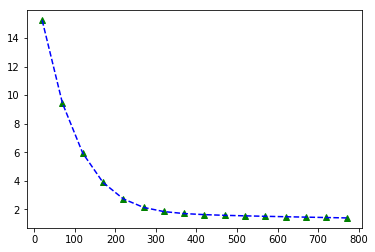

In [86]:
main()